# Importing libraries

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


## Importing the data

In [2]:
with open("response.json","r") as f:
    datastore=json.load(f)

In [3]:
Description=[]
IsSafe=[]

for item in datastore:
    IsSafe.append(item["isSafe"])
    requests = item['req']
    Description.append(requests['body']['note']['desc'])

In [4]:
print(np.array(Description[:5]))
print(np.array(IsSafe[:5]))

['Top recognize eat. Fact whom spend area thing material.\nWar no recent also message four billion. Water those deep.\nWord amount table entire. Drug several the amount live newspaper.'
 'As possible American many prepare four strong. Visit care be organization everyone kitchen development magazine. Range realize direction wife capital move.'
 'Tuesday Notes or 2 like 2 XSP Class'
 'State third represent energy campaign not forget there. Experience send these just heart suggest. Study paper common car kitchen it.\nSuch time management tree. Real like agency rule.'
 'Us enjoy since. Time identify image position ok here best. Box can throw yeah without.\nLeft explain author protect throw artist lot fly. Thing year approach through miss bank.']
[ True  True False  True False]


## Creating a corpus

In [5]:
corpus = []
for i in range(0, len(Description)):
    desc = re.sub('[^a-zA-Z]', ' ', Description[i])
    desc = desc.lower()
    desc = desc.split()
    lemmatizer = WordNetLemmatizer()
    desc = [lemmatizer.lemmatize(word) for word in desc if not word in set(stopwords.words('english'))]
    desc = ' '.join(desc)
    corpus.append(desc)

## Creating the sequences

In [6]:
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index

sequence = tokenizer.texts_to_sequences(corpus)
input_sequences= np.array(pad_sequences(sequence, maxlen=120, padding='pre'))


In [7]:
X=np.array(input_sequences)

In [8]:
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(IsSafe)

## Checking class balance

C:\Users\Lenovo\anaconda3\envs\Deep Learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


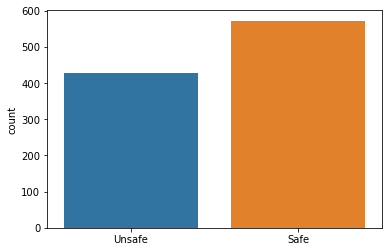

In [9]:
g = sns.countplot(y)
g.set_xticklabels(['Unsafe','Safe'])
plt.show()

In [10]:
d=Counter(y)
print(d[0],d[1])

428 572


##  Splitting the dataset into the Training set and Test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Model training

In [12]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [13]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7* 10**(epoch / 20))
    
opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(24, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test),
                    verbose=2,callbacks=[lr_schedule])

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 - 1s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 2/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 3/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 4/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 5/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 6/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 7/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6923 - val_accuracy: 0.5950
Epoch 8/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6923 - val_accuracy: 0.5950
Epoch 9/100
800/800 - 0s - loss: 0.6927 - accuracy: 0.5663 - val_loss: 0.6923 - val_accuracy: 0.5950
Epoch 10/100
800/800 - 0s - loss: 0.6927 - ac

Epoch 81/100
800/800 - 0s - loss: 0.4656 - accuracy: 0.8288 - val_loss: 0.4942 - val_accuracy: 0.8400
Epoch 82/100
800/800 - 0s - loss: 0.4126 - accuracy: 0.8375 - val_loss: 0.4725 - val_accuracy: 0.8400
Epoch 83/100
800/800 - 0s - loss: 0.3674 - accuracy: 0.8462 - val_loss: 0.4613 - val_accuracy: 0.8400
Epoch 84/100
800/800 - 0s - loss: 0.3296 - accuracy: 0.8500 - val_loss: 0.4733 - val_accuracy: 0.7900
Epoch 85/100
800/800 - 0s - loss: 0.2921 - accuracy: 0.8788 - val_loss: 0.4698 - val_accuracy: 0.8250
Epoch 86/100
800/800 - 0s - loss: 0.2595 - accuracy: 0.8900 - val_loss: 0.5201 - val_accuracy: 0.8400
Epoch 87/100
800/800 - 0s - loss: 0.2253 - accuracy: 0.9087 - val_loss: 0.5152 - val_accuracy: 0.7900
Epoch 88/100
800/800 - 0s - loss: 0.1904 - accuracy: 0.9350 - val_loss: 0.5370 - val_accuracy: 0.7900
Epoch 89/100
800/800 - 0s - loss: 0.1618 - accuracy: 0.9588 - val_loss: 0.5745 - val_accuracy: 0.7950
Epoch 90/100
800/800 - 0s - loss: 0.1396 - accuracy: 0.9575 - val_loss: 0.6161 - v

Text(0, 0.5, 'Loss')

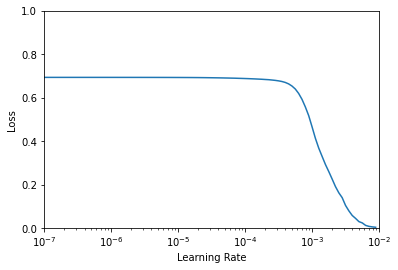

In [14]:
# FROM THIS PICK A LEARNING RATE
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7,1e-2, 0, 1])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

## To remove overfitting: Optimize Learning rate, introduce Dropout Layer  and L2 regularizer

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    
opt_model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=l2(0.2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation='sigmoid')
])
opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
final_model=opt_model.fit(X_train, y_train,epochs=100,validation_data=(X_test,y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/sample - loss: 4.0822 - accuracy: 0.5713 - val_loss: 3.7321 - val_accuracy: 0.5950
Epoch 2/100
800/800 [==============================] - 0s 172us/sample - loss: 3.4488 - accuracy: 0.5663 - val_loss: 3.1558 - val_accuracy: 0.5950
Epoch 3/100
800/800 [==============================] - 0s 172us/sample - loss: 2.9230 - accuracy: 0.5663 - val_loss: 2.6815 - val_accuracy: 0.5950
Epoch 4/100
800/800 [==============================] - 0s 172us/sample - loss: 2.4926 - accuracy: 0.5663 - val_loss: 2.2920 - val_accuracy: 0.5950
Epoch 5/100
800/800 [==============================] - 0s 176us/sample - loss: 2.1393 - accuracy: 0.5663 - val_loss: 1.9741 - val_accuracy: 0.5950
Epoch 6/100
800/800 [==============================] - 0s 172us/sample - loss: 1.8501 - accuracy: 0.5663 - val_loss: 1.7134 - val_accuracy: 0.5950
Epoch 7/100
800/800 [==============================] - 0s 175us/sample - l

800/800 [==============================] - 0s 190us/sample - loss: 0.5243 - accuracy: 0.8338 - val_loss: 0.5609 - val_accuracy: 0.8400
Epoch 57/100
800/800 [==============================] - 0s 163us/sample - loss: 0.5225 - accuracy: 0.8325 - val_loss: 0.5608 - val_accuracy: 0.8400
Epoch 58/100
800/800 [==============================] - 0s 163us/sample - loss: 0.5100 - accuracy: 0.8363 - val_loss: 0.5574 - val_accuracy: 0.8400
Epoch 59/100
800/800 [==============================] - 0s 147us/sample - loss: 0.5091 - accuracy: 0.8350 - val_loss: 0.5552 - val_accuracy: 0.8400
Epoch 60/100
800/800 [==============================] - 0s 162us/sample - loss: 0.5076 - accuracy: 0.8325 - val_loss: 0.5510 - val_accuracy: 0.8400
Epoch 61/100
800/800 [==============================] - 0s 147us/sample - loss: 0.5019 - accuracy: 0.8288 - val_loss: 0.5517 - val_accuracy: 0.8350
Epoch 62/100
800/800 [==============================] - 0s 183us/sample - loss: 0.5044 - accuracy: 0.8388 - val_loss: 0.5475 

## Prediction

In [16]:
y_pred=opt_model.predict_classes(X_test)

## Model and Evaluation

In [17]:
target_names = ['Unsafe', 'Safe']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Unsafe       0.93      0.62      0.74        81
        Safe       0.79      0.97      0.87       119

    accuracy                           0.82       200
   macro avg       0.86      0.79      0.80       200
weighted avg       0.84      0.82      0.82       200



In [18]:
train_acc = opt_model.evaluate(X_train, y_train)
test_acc = opt_model.evaluate(X_test,y_test)
print(train_acc, test_acc)

200/200 [==============================] - 0s 80us/sample - loss: 0.5192 - accuracy: 0.8250
[0.37990354299545287, 0.86375] [0.5191754221916198, 0.825]


## Data visualization

In [19]:
loss_train = final_model.history['loss']
loss_val = final_model.history['val_loss']
epochs=range(len(loss_train)) 

def plot_loss(training_loss,testing_loss):    

    plt.plot(epochs, training_loss, 'g', label='Training loss')
    plt.plot(epochs, testing_loss, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

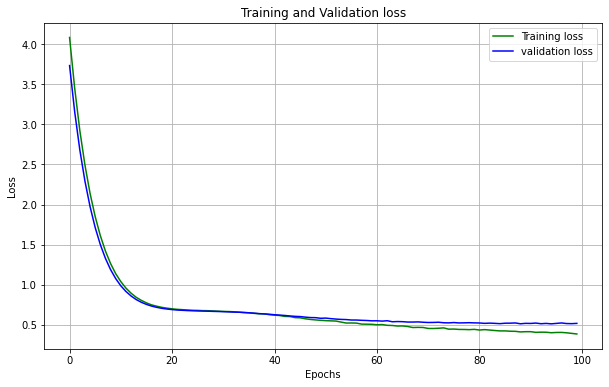

In [20]:
plt.figure(figsize=(10,6))
plot_loss(loss_train,loss_val)

In [21]:
acc_train = final_model.history['accuracy']
acc_val = final_model.history['val_accuracy']


def plot_accuracy(training_acc,testing_acc):    

    plt.plot(epochs, training_acc, 'g', label='Training Accuracy')
    plt.plot(epochs, testing_acc, 'b', label='validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

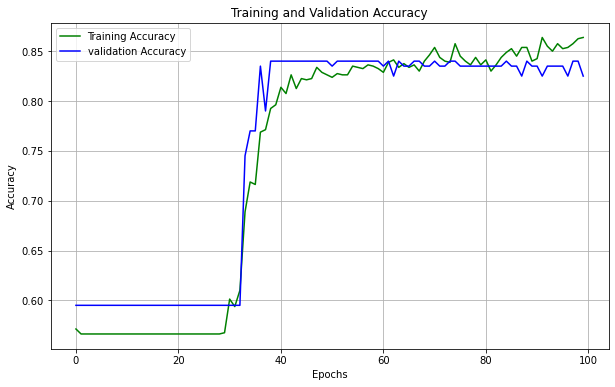

In [22]:
plt.figure(figsize=(10,6))
plot_accuracy(acc_train,acc_val)